In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
import planckStyle
import pylab
import numpy as np

#dir_name = '/Users/josevazquezgonzalez/Desktop/SimpleMC/SimpleMC/trunk/chains'
dir_name = '/home/osbuster/Documentos/Prueba2_SMC/SimpleMC-master/chains/Grad'

params1 = {'backend': 'pdf',
               'axes.labelsize': 20,
               'xtick.labelsize': 20,
               'ytick.labelsize': 20,
               'legend.fontsize': 16,
               'lines.markersize': 6,
               'font.size': 25,
               'text.usetex': True}#
pylab.rcParams.update(params1)


/usr/local/lib/python2.7/dist-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'color', 'lw', 'ls'
  s)


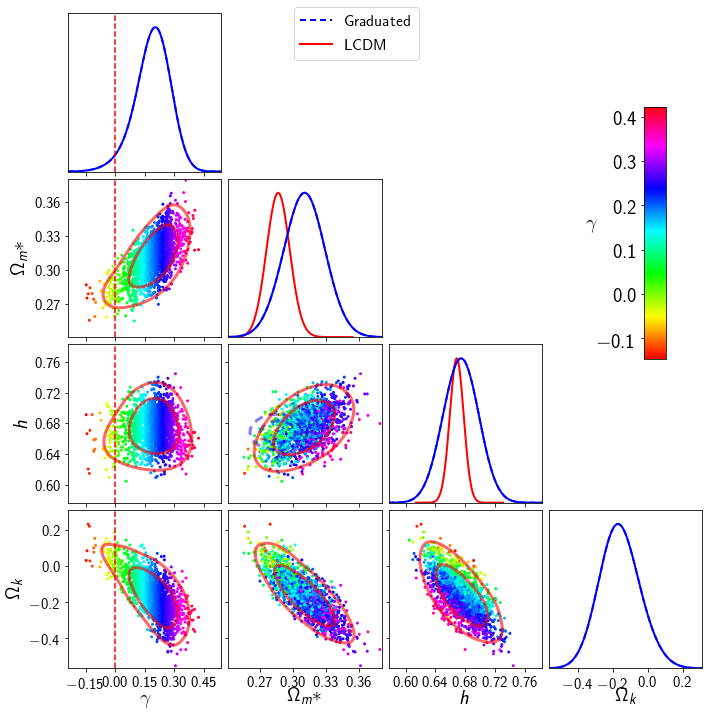

In [5]:
g= plots.getSubplotPlotter(chain_dir = dir_name, width_inch=10,
                           #, ratio=2,
                          analysis_settings={'smooth_scale_1D': 0.8, 'ignore_rows': 0.1, 'max_scatter_points':3000})
g.settings.axes_fontsize = 15
g.settings.lab_fontsize = 20
g.settings.colorbar_axes_fontsize=20
g.settings.colorbar_label_rotation= 0
g.settings.alpha_filled_add =0.9
g.settings.scatter_size = 9
g.settings.lw_contour=3
g.settings.colormap_scatter= 'hsv'
g.triangle_plot(['Grad_Ok_l00_phy_BBAO+SN+HD', 'LCDM_phy_BBAO+SN+HD','Grad_Ok_l00_phy_BBAO+SN+HD'], 
                ['ggama', 'Om', 'h', 'Ok'], 
                contour_args=[{'lw':2, 'color':'blue'}, 
                              {'lw':5, 'color':'red', 'ls':'-'},
                              {'lw':2, 'color':'blue'}], filled=False,
                alphas=[0.5, 0.6], legend_labels=['Graduated', 'LCDM'], 
                line_args=[{'lw':2, 'color':'blue'}, {'lw':2, 'color':'red', 'ls':'-'},
                           {'lw':2, 'color':'blue'}], 
                contour_colors=['blue','red', 'blue'],   
                 plot_3d_with_param='ggama')


for ax in g.subplots[:,0]:
    ax.axvline(0, color='red', ls='--')
#g.export('prueba.pdf')

### 

In [4]:
g= plots.getSinglePlotter(chain_dir = dir_name, width_inch=5, 
                          analysis_settings={'smooth_scale_1D': 0.8, 'ignore_rows': 0.1})
samples2 = g.sampleAnalyser.samplesForRoot('LCDM_phy_BBAO+SN+HD')
p2 = samples2.getParams()

Omh2 =p2.h**2*p2.Om
samples2.addDerived( Omh2 , name='Omh12', label='Omh2')
samples2.updateBaseStatistics()

<Figure size 500x375 with 0 Axes>

In [108]:
for i,j,k in zip(samples.paramNames.list(), samples.means, samples.sddev):
    print i,'\t \t',j,k

Om 	 	0.28614490876329474 0.010260270157852512
Obh2 	 	0.022058184774402242 0.000451694567393496
h 	 	0.6686158004398074 0.00903576618793521
DR11LOWZ_like 	 	-0.1899769162463921 0.23611854204224975
DR11CMASS_like 	 	-1.8522147951234151 0.5161395498265557
DR11LyaAuto_like 	 	-1.245764532518075 0.40031157217376456
DR11LyaCross_like 	 	-2.3631750113160135 0.27187540924870696
SixdFGS_like 	 	-0.014854334750980532 0.021284219085115484
MGS_like 	 	-1.1143810481682388 0.36593737231034956
BetouleSN_like 	 	-16.706226467358604 0.12051396428766972
HD_like 	 	-11.989191213945425 0.5226952184775661
theory_prior 	 	-0.48555337497590406 0.6756907523532306
Omh2 	 	0.1279407257301728 0.0056759804600603455


In [109]:
print samples.likeStats

Best fit sample -log(Like) = 34.493700
Ln(mean 1/like) = 38.191144
mean(-Ln(like)) = 35.961337
-Ln(mean like)  = 35.508585

parameter           bestfit        lower1         upper1         lower2         upper2
Om                  2.8579500E-01  2.6791700E-01  3.0591800E-01  2.5911500E-01  3.1610100E-01   \Omega_m*
Obh2                2.2034800E-02  2.1205800E-02  2.2854300E-02  2.0787600E-02  2.3298900E-02   \Omega_bh^2
h                   6.6778600E-01  6.5196300E-01  6.8429600E-01  6.4361600E-01  6.9269400E-01   h
DR11LOWZ_like      -1.0283100E-01 -8.0417200E-01 -1.7380200E-09 -1.3883900E+00 -5.9828400E-10   DR11LOWZ
DR11CMASS_like     -1.5282700E+00 -2.8617800E+00 -1.2536400E+00 -4.3513200E+00 -1.1361200E+00   DR11CMASS
DR11LyaAuto_like   -1.1575700E+00 -2.0796900E+00 -6.5052600E-01 -2.6559500E+00 -5.1458600E-01   DR11LyaAuto
DR11LyaCross_like  -2.3287800E+00 -2.9373800E+00 -1.9207500E+00 -3.3452700E+00 -1.7610700E+00   DR11LyaCross
SixdFGS_like       -1.6003300E-04 -5.2099300E-02 

In [115]:
print 0.6686- samples.twoTailLimits(p.h, 0.95)[0], samples.twoTailLimits(p.h, 0.95)[1] - 0.6686

0.01784999999999992 0.01736100000000007


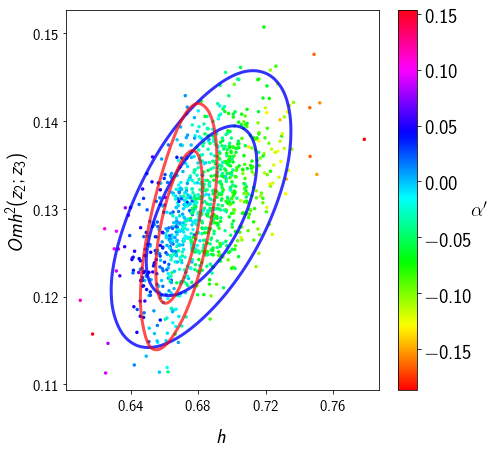

In [10]:
g= plots.getSubplotPlotter(chain_dir = dir_name, width_inch=7, 
                          analysis_settings={'smooth_scale_1D': 0.8, 'ignore_rows': 0.1,  'max_scatter_points':3000})
samples = g.sampleAnalyser.samplesForRoot('LogT_phy_BBAO+SN+HD')
p = samples.getParams()

g.settings.axes_fontsize = 15
g.settings.lab_fontsize = 20
g.settings.colorbar_axes_fontsize=20
g.settings.colorbar_label_rotation= 0
g.settings.alpha_filled_add =0.9
g.settings.scatter_size = 12
g.settings.lw_contour=3
g.settings.colormap_scatter= 'hsv'

z1= 0.0
z2 = 0.57
z3 = 2.34

zrho_0 = 0
z=zrho_0

al = p.alpha
Ode = 1 -p.Om

wdeterm1  = (1.0 + al)**2*(1+z)**3 - 2.*al
wdesqterm = np.sqrt(-4*al**2 + wdeterm1**2)
wdeterm2   = ((1.0 + al)**2 - 2)*(1.0 + z)**3
num = (1- Ode)*(wdeterm2 + wdesqterm)
den = (1- Ode)*(wdeterm2 - 2*al + wdesqterm - 2*al*np.log(0.5*(wdeterm1 + wdesqterm))) + 2*Ode
wde = -1 + num/den

rhode = 1 - p.Obh2/(p.h**2)*(1 - 0.5*(wdeterm1 + wdesqterm) + 
                             al*np.log(0.5*(wdeterm1 + wdesqterm))) - p.Obh2/(p.h**2)*(1+z)**3


term1 = (al+1)**2*(z1+1)**3
sqterm1 = np.sqrt((term1 - 2*al)**2-4*al**2)
term2 = (al+1)**2*(z2+1)**3
sqterm2 = np.sqrt((term2 - 2*al)**2-4*al**2)
term3 = (al+1)**2*(z3+1)**3
sqterm3 = np.sqrt((term3 - 2*al)**2-4*al**2)

Omh12 = p.h**2*p.Om*(term1 + sqterm1 - 2*al*np.log(0.5*(-2*al+term1 + sqterm1)) -
                    term2 - sqterm2 + 2*al*np.log(0.5*(-2*al+term2 + sqterm2)))/(2*((z1+1)**3 - (z2+1)**3))
Omh13 = p.h**2*p.Om*(term1 + sqterm1 - 2*al*np.log(0.5*(-2*al+term1 + sqterm1)) -
                    term3 - sqterm3 + 2*al*np.log(0.5*(-2*al+term3 + sqterm3)))/(2*((z1+1)**3 - (z3+1)**3))
Omh23 = p.h**2*p.Om*(term2 + sqterm2 - 2*al*np.log(0.5*(-2*al+term2 + sqterm2)) -
                    term3 - sqterm3 + 2*al*np.log(0.5*(-2*al+term3 + sqterm3)))/(2*((z2+1)**3 - (z3+1)**3))
        


samples.addDerived( Omh12 , name='Omh12', label='Omh^2(z_1;z_2)')
samples.addDerived( Omh13 , name='Omh13', label='Omh^2(z_1;z_3)')
samples.addDerived( Omh23 , name='Omh23', label='Omh^2(z_2;z_3)')
samples.addDerived( wde , name='wde', label='w_{DE,0}')
samples.addDerived( rhode , name='rhode', label='\rho_{DE,0}')
samples.updateBaseStatistics()

#LCDM model
samples2 = g.sampleAnalyser.samplesForRoot('LCDM_phy_BBAO+SN+HD')
p2 = samples2.getParams()

Omh2 =p2.h**2*p2.Om
samples2.addDerived( Omh2 , name='Omh23', label='Omh2')
samples2.updateBaseStatistics()


g.plot_2d(['LogT_phy_BBAO+SN+HD','LCDM_phy_BBAO+SN+HD'], param_pair=['h', 'Omh23'],  filled=False, 
          legend_labels=False, alphas=[0.8, 0.7], contour_colors=['blue','red'],
             contour_args=[{'lw':1, 'color':'blue', 'ls':'-'}, {'lw':2, 'color':'red', 'ls':'-'}])
g.plot_3d(['LogT_phy_BBAO+SN+HD'],  ['h','Omh23','alpha'], alphas=0.9, color_bar=True)

#g.rectangle_plot(['alpha'], ['h','Omh12','Omh13','Omh23'], roots='LogT_phy_BBAO+SN+HD', filled=True) #, xmarkers=[-2], ymarkers=[0,0,0,0])
#g.plots_1d(['LogT_phy_BBAO+SN+HD'], ['Omh12','Omh13','Omh23'], 
#           legend_labels=False,  markers=[0,0], nx=2)

#g.add_legend(['$Omh^2(z_1;z_3)$'],  colored_text=True,  legend_loc='upper left')
g.export('Omh2z2z3.pdf')

In [118]:
for i,j,k in zip(samples.paramNames.list(), samples.means, samples.sddev):
    print i,'\t \t',j,k

Om 	 	0.2983954146259897 0.018549395648074025
Obh2 	 	0.021968228176982175 0.00045216045742279605
h 	 	0.6820687479838909 0.021332794296572664
alpha 	 	-0.03235656324275018 0.04390748222988131
DR11LOWZ_like 	 	-0.20511693962896127 0.2455121300942272
DR11CMASS_like 	 	-1.938439947093849 0.5166430884752847
DR11LyaAuto_like 	 	-1.0222636209129816 0.5653717390770862
DR11LyaCross_like 	 	-2.7230624241111103 0.5663811651297603
SixdFGS_like 	 	-0.015640596160050754 0.02185047661327219
MGS_like 	 	-1.1100568871143752 0.3760011354075198
BetouleSN_like 	 	-16.702684770992164 0.14475084585321696
HD_like 	 	-11.986945350424493 0.8193880995484598
theory_prior 	 	-0.4894358530816541 0.6707535463735528
Omh12 	 	0.13179059624298747 0.0077718052048399945
Omh13 	 	0.1299844013449538 0.0064155015353896585
Omh23 	 	0.12982915679761278 0.006325572677318127
wde 	 	-1.015130867608463 0.01967522779043402
rhode 	 	0.9526413604255566 0.0031038801910465885


In [119]:
print 0.6820- samples.twoTailLimits(p.h, 0.95)[0], samples.twoTailLimits(p.h, 0.95)[1] - 0.6820
#print samples.getMargeStats()

0.041459000000000024 0.04170799999999997


In [67]:
print samples.getMargeStats()

Marginalized limits: 0.68; 0.95; 0.99

parameter           mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
Om                  2.9839541E-01  1.8549396E-02  2.7979900E-01  3.1672400E-01  two    2.6262300E-01  3.3510100E-01  two    2.5156800E-01  3.4860300E-01  two     \Omega_m
Obh2                2.1968228E-02  4.5216046E-04  2.1513100E-02  2.2429700E-02  two    2.1081600E-02  2.2836800E-02  two    2.0802400E-02  2.3067700E-02  two     \Omega_bh^2
h                   6.8206875E-01  2.1332794E-02  6.6093700E-01  7.0333600E-01  two    6.4054100E-01  7.2370800E-01  two    6.2587300E-01  7.3760300E-01  two     h
alpha              -3.2356563E-02  4.3907482E-02 -7.9790060E-02  1.0529048E-02  two   -1.1997505E-01  5.9302694E-02  two   -1.4109800E-01  9.7788800E-02  two     \alpha'
DR11LOWZ_like      -2.0511694E-01  2.4551213E-01 -3.4938491E-01  9.2594540E-02  two   -7.0355500E-01  5.7366608E-02  <  

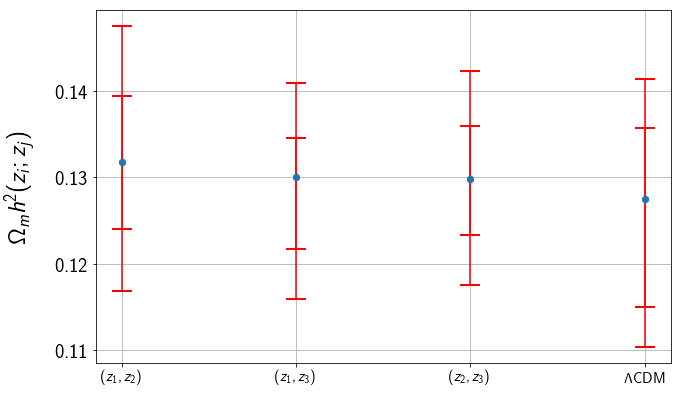

In [58]:
x = np.array([-13., -13, -12, -12, -11, -11, -10, -10])
y = np.array([1.3179060E-01, 1.3179060E-01, 
              1.2998440E-01, 1.2998440E-01, 
              1.2982916E-01, 1.2982916E-01, 
              1.2744689E-01, 1.2744689E-01])


import matplotlib
fig, ax = plt.subplots(figsize=(10, 6))


ax.errorbar(x, y, yerr=[[y[0]-1.2403059E-01,  y[0]-1.1679648E-01, 
                         y[1]-1.2354291E-01,  y[1]-1.1765399E-01,
                         y[2]-1.2349171E-01,  y[2]-1.1765045E-01, 
                         y[3]-1.1754988E-01,  y[3]-1.1283913E-01], 
                        [1.3942346E-01 -y[0], 1.4751306E-01 -y[0], 
                         1.3633525E-01 -y[1], 1.4277330E-01 -y[1],
                         1.3613185E-01 -y[2], 1.4246817E-01 -y[2], 
                         1.3831123E-01 -y[3], 1.4388516E-01 -y[3]]], 
                        fmt='o', capsize=10, ecolor='r', capthick=2 )


    
ax.set_xticks([-13,  -12, -11, -10] )
ax.set_xticklabels(['$(z_1,z_2)$', '$(z_1,z_3)$', '$(z_2,z_3)$', '$\Lambda$CDM'], 
                   fontdict={'fontsize':15})
#xticks_minor = [-17, -16, -14, -13, -12, -11, -10 ]
ax.set_ylabel('$\Omega_{m}h^2 (z_i;z_j)$', rotation=90, fontsize=25, labelpad=20)
#ax.set_xlabel('', fontsize=25, labelpad=15)
##ax.xaxis.set_label_coords(0.75, -0.15)
plt.grid(True)
plt.tight_layout()
plt.savefig('errors.pdf')

/Users/josevazquezgonzalez/Desktop/Desktop_Jose/work/Papers/Scalar_Fields/Scalar_Fields/forJose_fgivenx/chains/LogT_phy_BBAO+SN+HD_rho_z.txt
Removed 0.1 as burn in


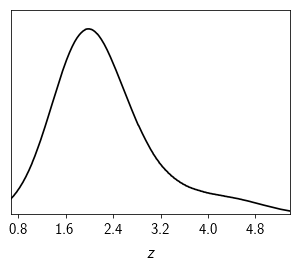

In [91]:
dir_name='/Users/josevazquezgonzalez/Desktop/Desktop_Jose/work/Papers/Scalar_Fields/Scalar_Fields/forJose_fgivenx/chains/'
g= plots.getSinglePlotter(chain_dir = dir_name, width_inch=5, 
                          analysis_settings={'smooth_scale_1D': 0.8, 'ignore_rows': 0.1})
samples = g.sampleAnalyser.samplesForRoot('LogT_phy_BBAO+SN+HD_rho_z')
g.settings.axes_fontsize = 15
#g.settings.lab_fontsize = 25
g.settings.alpha_filled_add =0.9
#g.setAxes(lims=[-0.17, 0.092, 0, 1])

g.plot_1d(['LogT_phy_BBAO+SN+HD_rho_z'], 'z', legend_labels=False)


In [92]:
#for i,j,k in zip(samples.paramNames.list(), samples.means, samples.sddev):
#    print i,'\t \t',j,k


z 	 	2.2332166595578156 0.8098412032556052


#### Comparison with dr12 -lowz

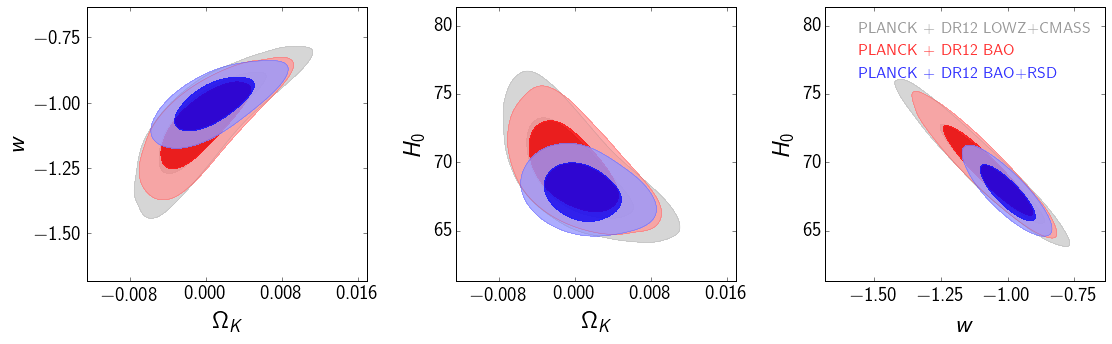

In [400]:
roots = ['owcdmdr12','OkwoCDM_PLK+BAO12','OkwoCDM_PLK+DR12']
g = plots.getSubplotPlotter(chain_dir= dir_name, width_inch=16, analysis_settings={'smooth_scale_2D': -1.})
g.settings.axes_fontsize = 20
g.settings.lab_fontsize = 25
g.settings.alpha_filled_add =0.9

g.plots_2d(roots, param_pairs=[['omegak','w'], ['omegak','H0'], ['w','H0']], nx=3, filled=True, 
           legend_labels=False, line_args={'lw':2,  'ls':'-'}, 
           colors = ['gray', 'red', 'blue'], alphas=[0.8,0.8,0.8])

g.add_legend(['PLANCK + DR12 LOWZ+CMASS', 'PLANCK + DR12 BAO', 'PLANCK + DR12 BAO+RSD'], 
             colored_text=True,  legend_loc='upper right')


# DR12 (BAO+RSD+JLA)

((-2.0, 0.0), (-2.0, 2.0))

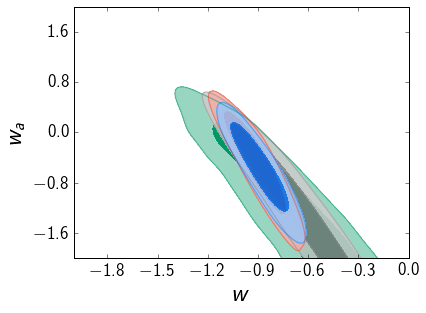

In [23]:
roots = ['OkwowaCDM_PLK+BAO12','OkwowaCDM_PLK+DR12', 'OkwowaCDM_PLK+DR12+JLA','OkwowaCDM_PLK+DR12+ALLB+JLA']

g = plots.getSinglePlotter(chain_dir= dir_name,  analysis_settings={'smooth_scale_2D': -1.})
g.settings.axes_fontsize = 18
g.settings.lab_fontsize = 25
g.plot_2d(roots, param_pair=['w','wa'], filled=True, legend_labels=False)

((-0.013854912907530981, 0.013389522907530982), (-2.0, 2.0))

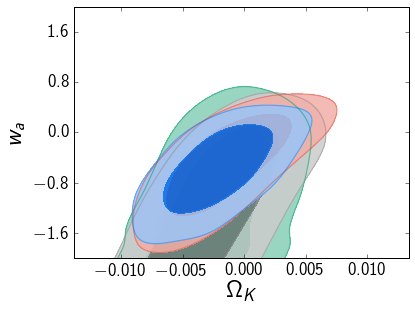

In [24]:
g =plots.getSinglePlotter(chain_dir= dir_name,  analysis_settings={'smooth_scale_2D': -1.})
g.settings.axes_fontsize = 18
g.settings.lab_fontsize = 25
g.plot_2d(roots, param_pair=['omegak','wa'], filled=True, legend_labels=False)
#wa = plots.ParamInfo(label='w_a')
#g.set_xlabel(wa)
#g.export('mnu_nnu2.pdf')

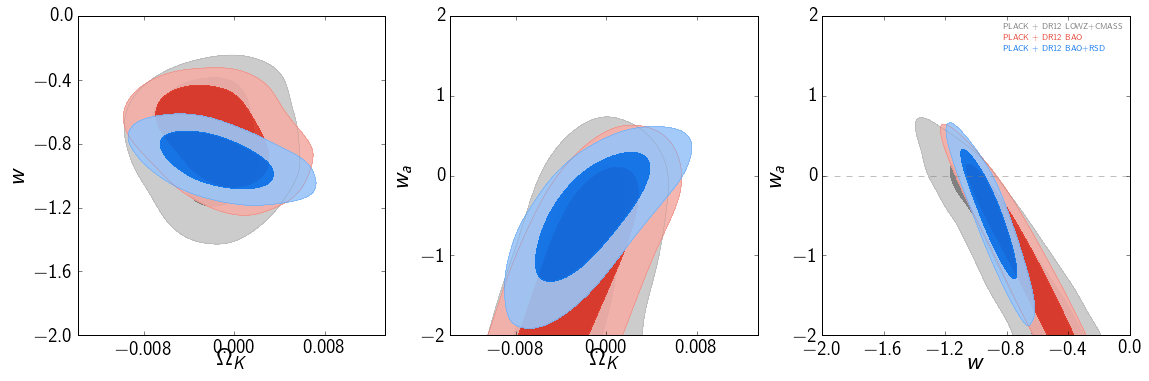

In [35]:

roots = ['OkwowaCDM_PLK+BAO12','OkwowaCDM_PLK+DR12', 'OkwowaCDM_PLK+DR12+JLA']

g = plots.getSubplotPlotter(chain_dir= dir_name, width_inch=16,  analysis_settings={'smooth_scale_2D': -1.})
g.settings.axes_fontsize = 20
g.settings.lab_fontsize = 25
g.settings.alpha_filled_add =0.9

g.plots_2d(roots, param_pairs=[['omegak','w'], ['omegak','wa'], ['w','wa']], nx=3, filled=True, 
           legend_labels=False)
g.add_y_marker(0)


g.add_legend(['PLACK + DR12 LOWZ+CMASS', 'PLACK + DR12 BAO', 'PLACK + DR12 BAO+RSD'], 
             colored_text=True,  legend_loc='upper right')
g.export('OkwoCDM_0.pdf')

# Modified gravity

/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/LCDM_ABfs8_PLK+DR12+ALLB_1.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/LCDM_ABfs8_PLK+DR12+ALLB_2.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/LCDM_ABfs8_PLK+DR12+ALLB_3.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/LCDM_ABfs8_PLK+DR12+ALLB_4.txt
Removed 0.2 as burn in


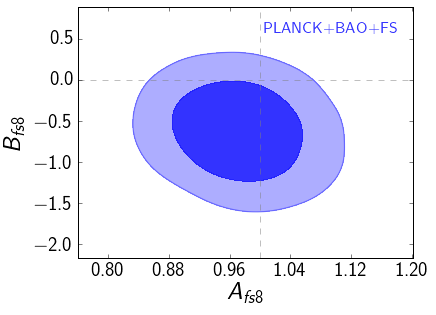

In [8]:

roots = ['LCDM_ABfs8_PLK+DR12+ALLB']

g = plots.getSinglePlotter(chain_dir= dir_name, analysis_settings={'smooth_scale_2D': -1., 'ignore_rows': 0.2})
g.settings.axes_fontsize = 20
g.settings.lab_fontsize = 25
g.settings.alpha_filled_add =0.9
g.add_y_marker(0)
g.add_x_marker(1)
g.plot_2d(roots, 'Afs8','Bfs8', filled=True, legend_labels=False, colors = ['blue'], alphas=[0.8])
g.add_legend(['PLANCK+BAO+FS'], colored_text=True,  legend_loc='upper right')

# Neutrinos

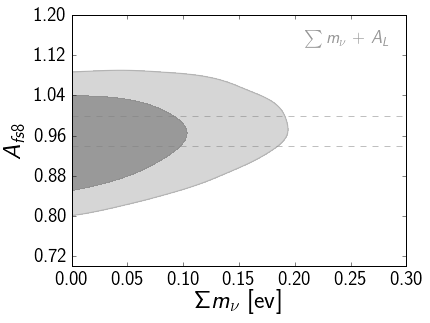

In [8]:

#roots = ['mnu_Alens_Afs8_PLK+DR12', 'mnu_Alens_PLK+DR12',  'mnu_Afs8_PLK+DR12', 'mnu_PLK+DR12']
roots = [ 'mnu_Afs8_PLK+DR12+ALLB']

g = plots.getSinglePlotter(chain_dir= dir_name, analysis_settings={'smooth_scale_2D': -1.})
g.settings.axes_fontsize = 20
g.settings.lab_fontsize = 25
g.settings.alpha_filled_add =0.9
g.settings.legend_fontsize = 18
g.add_y_marker(1)
g.add_y_marker(0.94)
g.plot_2d(roots, 'mnu','Afs8', filled=True, legend_labels=False, lims = [ 0.0, 0.3, 0.7, 1.2],
         colors = ['gray', 'red', 'blue'], alphas=[0.8,0.8,0.8,0.8])
g.add_legend([
              ' $\sum m_{\\nu}$ + $A_L$',
                '$\sum m_{\\nu}$ + $A_{f\sigma_8}$',
             '$\sum m_{\\nu}$ '],
             colored_text=True,  legend_loc='upper right')
g.export('Afs8_mnu_2d.pdf')

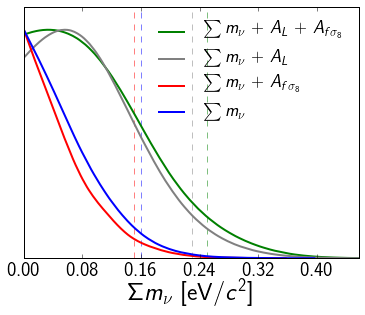

In [9]:
roots = ['mnu_Alens_Afs8_PLK+DR12+ALLB', 'mnu_Alens_PLK+DR12+ALLB',  'mnu_Afs8_PLK+DR12+ALLB', 'mnu_PLK+DR12+ALLB']

g = plots.getSinglePlotter(chain_dir= dir_name, analysis_settings={'smooth_scale_1D': -1, 'ignore_rows': 0.2} )
g.settings.axes_fontsize = 20
g.settings.lab_fontsize = 25
g.settings.alpha_filled_add =0.9
g.settings.legend_fontsize = 18
g.settings.legend_frame = False

g.add_x_marker(0.16, color='blue')
g.add_x_marker(0.23, color='gray')
g.add_x_marker(0.15, color='red')
g.add_x_marker(0.25, color='green')
g.plot_1d(roots, 'mnu', legend_labels=False, colors = ['green', 'gray', 'red', 'blue'])
g.add_legend(['$\sum m_{\\nu}$ + $A_L$ + $A_{f\sigma_8}$', 
              ' $\sum m_{\\nu}$ + $A_L$',
                '$\sum m_{\\nu}$ + $A_{f\sigma_8}$',
             '$\sum m_{\\nu}$ '], 
               legend_loc='upper right')

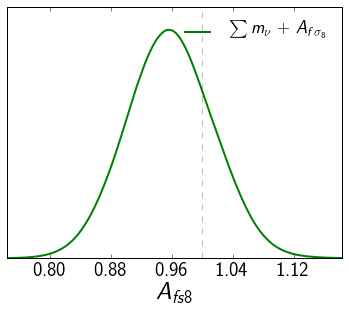

In [14]:
roots = ['mnu_Afs8_PLK+DR12+ALLB']

g = plots.getSinglePlotter(chain_dir= dir_name, analysis_settings={'smooth_scale_1D': -1, 'ignore_rows': 0.3} )
g.settings.axes_fontsize = 20
g.settings.lab_fontsize = 25
g.settings.alpha_filled_add =0.9
g.settings.legend_fontsize = 18
g.settings.legend_frame = False
g.add_x_marker(1)
g.plot_1d(roots, 'Afs8', legend_labels=False, colors = ['green', 'gray', 'red', 'blue'])
g.add_legend([  '$\sum m_{\\nu}$ + $A_{f\sigma_8}$',
             ], 
               legend_loc='upper right')
g.export('Afs8_mnu.pdf')

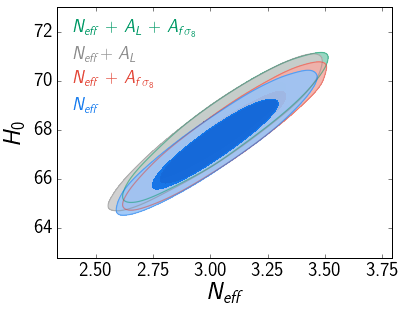

In [9]:
roots = ['Neff_Alens_Afs8_PLK+DR12', 'Neff_Alens_PLK+DR12',  'Neff_Afs8_PLK+DR12', 'Neff_PLK+DR12']

g = plots.getSinglePlotter(chain_dir= dir_name, analysis_settings={'smooth_scale_2D': -1.})
g.settings.axes_fontsize = 20
g.settings.lab_fontsize = 25
g.settings.alpha_filled_add =0.9
g.settings.legend_fontsize = 18

g.plot_2d(roots, 'nnu','H0', filled=True, legend_labels=False)
g.add_legend(['$N_{eff}$ + $A_L$ + $A_{f\sigma_8}$', 
              ' $N_{eff}$+ $A_L$',
                '$N_{eff}$ + $A_{f\sigma_8}$',
             '$N_{eff}$ '],
             colored_text=True,  legend_loc='upper left')


# Paper Plots
# Comparison with previous work

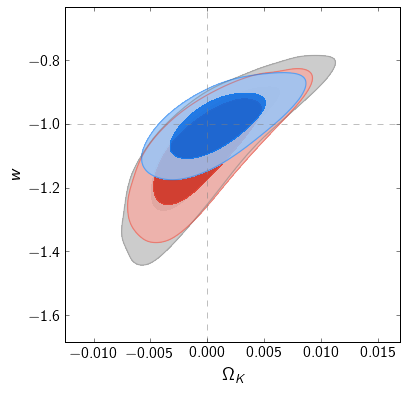

In [56]:
roots = ['owcdmdr12','OkwoCDM_PLK+BAO12','OkwoCDM_PLK+DR12']

g= plots.getSinglePlotter(chain_dir = dir_name, ratio=1., analysis_settings={'smooth_scale_2D': -1.})
g.plot_2d(roots, param_pair=['omegak','w'], filled=True, legend_labels=False, line_args={'lw':2,  'ls':'-'})

#g = plots.getSubplotPlotter(chain_dir= dir_name, width_inch=16, analysis_settings={'smooth_scale_2D': -1.})
g.settings.axes_fontsize = 20
g.settings.lab_fontsize = 25
g.settings.alpha_filled_add =0.9
g.add_y_marker(-1)
g.add_x_marker(0)

#g.plots_2d(roots, param_pairs=[['omegak','w'], ['omegak','H0'], ['w','H0']], nx=3, filled=True, 
#           legend_labels=False, line_args={'lw':2,  'ls':'-'})

#g.add_legend(['PLACK + DR12 LOWZ+CMASS', 'PLACK + DR12 BAO', 'PLACK + DR12 BAO+RSD'], 
#             colored_text=True,  legend_loc='upper right')
g.export('OkwoCDM_1.pdf')

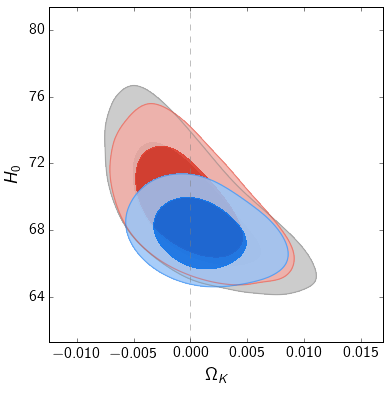

In [25]:
roots = ['owcdmdr12','OkwoCDM_PLK+BAO12','OkwoCDM_PLK+DR12']

g= plots.getSinglePlotter(chain_dir = dir_name, ratio=1., analysis_settings={'smooth_scale_2D': -1.})
g.plot_2d(roots, 'omegak','H0', filled=True, legend_labels=False, line_args={'lw':2,  'ls':'-'})

g.settings.axes_fontsize = 20
g.settings.lab_fontsize = 25
g.settings.alpha_filled_add =0.9

g.add_x_marker(0)
g.export('OkwoCDM_2.pdf')

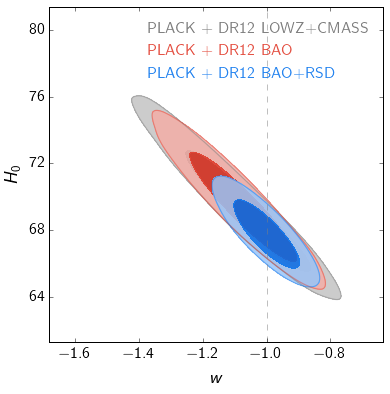

In [26]:
roots = ['owcdmdr12','OkwoCDM_PLK+BAO12','OkwoCDM_PLK+DR12']

g= plots.getSinglePlotter(chain_dir = dir_name, ratio=1., analysis_settings={'smooth_scale_2D': -1.})
g.plot_2d(roots, 'w','H0', filled=True, legend_labels=False, line_args={'lw':2,  'ls':'-'})

g.settings.axes_fontsize = 20
g.settings.lab_fontsize = 25
g.settings.alpha_filled_add =0.9

g.add_x_marker(-1)

g.add_legend(['PLACK + DR12 LOWZ+CMASS', 'PLACK + DR12 BAO', 'PLACK + DR12 BAO+RSD'], 
             colored_text=True,  legend_loc='upper right')
g.export('OkwoCDM_3.pdf')

# New chains

/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/OkwoCDM_PLK+JLA_1.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/OkwoCDM_PLK+JLA_2.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/OkwoCDM_PLK+JLA_3.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/OkwoCDM_PLK+JLA_4.txt
Removed 0.03 as burn in
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/OkwoCDM_PLK+BAO12+ALLB_1.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/OkwoCDM_PLK+BAO12+ALLB_2.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/OkwoCDM_PLK+BAO12+ALLB_3.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/OkwoCDM_PLK+BAO12+ALLB_4.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/OkwoCDM_PLK+BAO12+ALLB_5.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/OkwoCDM_PLK+BAO12+ALLB_6.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/OkwoCDM_PLK+BAO12+ALL

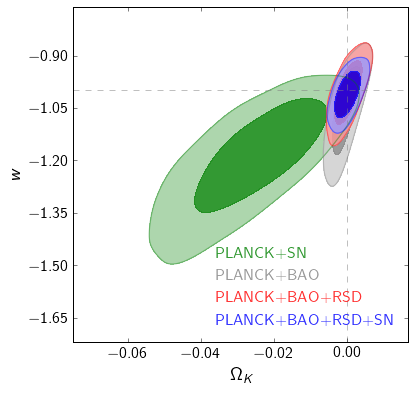

In [3]:
roots = ['OkwoCDM_PLK+JLA', 'OkwoCDM_PLK+BAO12+ALLB', 'OkwoCDM_PLK+DR12+ALLB', 'OkwoCDM_PLK+DR12+ALLB+JLA']

g= plots.getSinglePlotter(chain_dir = dir_name, ratio=1., analysis_settings={'smooth_scale_2D': -1.,
                                                                            'ignore_rows': 0.03})
g.plot_2d(roots, param_pair=['omegak','w'], filled=True, legend_labels=False, line_args={'lw':2,  'ls':'-'},
         colors = ['green', 'gray', 'red', 'blue'], alphas=[0.8,0.8,0.8,0.8])

#g = plots.getSubplotPlotter(chain_dir= dir_name, width_inch=16, analysis_settings={'smooth_scale_2D': -1.})
g.settings.axes_fontsize = 20
g.settings.lab_fontsize = 25
g.settings.alpha_filled_add =0.9
g.add_y_marker(-1)
g.add_x_marker(0)

#g.plots_2d(roots, param_pairs=[['omegak','w'], ['omegak','H0'], ['w','H0']], nx=3, filled=True, 
#           legend_labels=False, line_args={'lw':2,  'ls':'-'})

g.add_legend(['PLANCK+SN', 'PLANCK+BAO', 'PLANCK+BAO+RSD', 'PLANCK+BAO+RSD+SN'], 
             colored_text=True,  legend_loc='lower right')
#g.export('OkwoCDM_all.pdf')

/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/wowaCDM_PLK+JLA_1.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/wowaCDM_PLK+JLA_2.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/wowaCDM_PLK+JLA_3.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/wowaCDM_PLK+JLA_4.txt
Removed 0.2 as burn in
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/wowaCDM_PLK+BAO12+ALLB_1.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/wowaCDM_PLK+BAO12+ALLB_2.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/wowaCDM_PLK+BAO12+ALLB_3.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/wowaCDM_PLK+BAO12+ALLB_4.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/wowaCDM_PLK+BAO12+ALLB_5.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/wowaCDM_PLK+BAO12+ALLB_6.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/wowaCDM_PLK+BAO12+ALLB

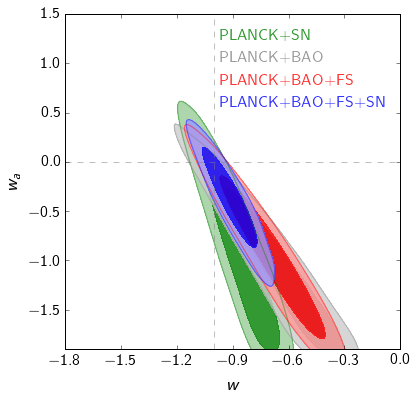

In [2]:
roots = ['wowaCDM_PLK+JLA','wowaCDM_PLK+BAO12+ALLB', 'wowaCDM_PLK+DR12+ALLB', 'wowaCDM_PLK+DR12+ALLB+JLA']

g= plots.getSinglePlotter(chain_dir = dir_name, ratio=1., analysis_settings={'smooth_scale_2D': -1.,
                                                                            'ignore_rows': 0.2})
g.plot_2d(roots, param_pair=['w','wa'], filled=True, legend_labels=False, line_args={'lw':2,  'ls':'-'},
             lims=[-1.8,0,-1.9,1.5], colors = ['green', 'gray', 'red', 'blue'], alphas=[0.8,0.8,0.8,0.8])

#g = plots.getSubplotPlotter(chain_dir= dir_name, width_inch=16, analysis_settings={'smooth_scale_2D': -1.})
g.settings.axes_fontsize = 20
g.settings.lab_fontsize = 25
g.settings.alpha_filled_add =0.9
g.add_y_marker(0)
g.add_x_marker(-1)

#g.plots_2d(roots, param_pairs=[['omegak','w'], ['omegak','H0'], ['w','H0']], nx=3, filled=True, 
#           legend_labels=False, line_args={'lw':2,  'ls':'-'})

g.add_legend(['PLANCK+SN','PLANCK+BAO', 'PLANCK+BAO+FS', 'PLANCK+BAO+FS+SN'], 
             colored_text=True,  legend_loc='upper right')
#g.export('OkwoCDM_all.pdf')

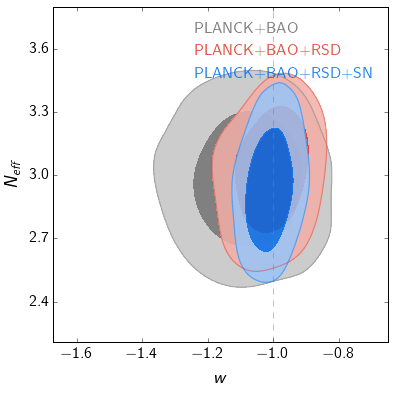

In [78]:
roots = ['OkwoCDM_Neff_PLK+BAO12', 'OkwoCDM_Neff_PLK+DR12', 'OkwoCDM_Neff_PLK+DR12+JLA']

g= plots.getSinglePlotter(chain_dir = dir_name, ratio=1., analysis_settings={'smooth_scale_2D': -1.})
g.plot_2d(roots, param_pair=['w','nnu'], filled=True, legend_labels=False, line_args={'lw':2,  'ls':'-'})

#g = plots.getSubplotPlotter(chain_dir= dir_name, width_inch=16, analysis_settings={'smooth_scale_2D': -1.})
g.settings.axes_fontsize = 20
g.settings.lab_fontsize = 25
g.settings.alpha_filled_add =0.9
g.add_y_marker(0)
g.add_x_marker(-1)

#g.plots_2d(roots, param_pairs=[['omegak','w'], ['omegak','H0'], ['w','H0']], nx=3, filled=True, 
#           legend_labels=False, line_args={'lw':2,  'ls':'-'})

g.add_legend(['PLANCK+BAO', 'PLANCK+BAO+RSD', 'PLANCK+BAO+RSD+SN'], 
             colored_text=True,  legend_loc='upper right')
#g.export('OkwoCDM_all.pdf')

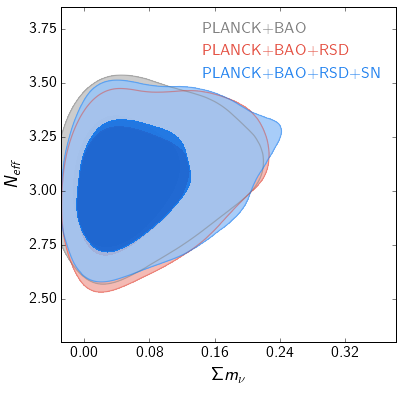

In [75]:
roots = ['Neff_mnu_PLK+BAO12', 'Neff_mnu_PLK+DR12', 'Neff_mnu_PLK+DR12+JLA']

g= plots.getSinglePlotter(chain_dir = dir_name, ratio=1., analysis_settings={'smooth_scale_2D': 2.})
g.plot_2d(roots, param_pair=['mnu','nnu'], filled=True, legend_labels=False, line_args={'lw':2,  'ls':'-'})

#g = plots.getSubplotPlotter(chain_dir= dir_name, width_inch=16, analysis_settings={'smooth_scale_2D': -1.})
g.settings.axes_fontsize = 20
g.settings.lab_fontsize = 25
g.settings.alpha_filled_add =0.9
g.add_y_marker(0)
g.add_x_marker(-1)

#g.plots_2d(roots, param_pairs=[['omegak','w'], ['omegak','H0'], ['w','H0']], nx=3, filled=True, 
#           legend_labels=False, line_args={'lw':2,  'ls':'-'})

g.add_legend(['PLANCK+BAO', 'PLANCK+BAO+RSD', 'PLANCK+BAO+RSD+SN'], 
             colored_text=True,  legend_loc='upper right')
#g.export('OkwoCDM_all.pdf')

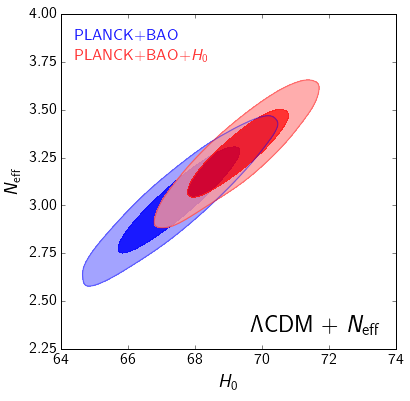

In [5]:
roots = ['Neff_PLK+DR12+ALLB','Neff_PLK+DR12+ALLB+HST']
#'OkwoCDM+Neff_PLK+DR12+ALLB+JLA', 'OkwoCDM+Neff_PLK+DR12+ALLB+JLA+HST',
g= plots.getSinglePlotter(chain_dir = dir_name, ratio=0.8, analysis_settings={'smooth_scale_2D': -1,
                                                                            'ignore_rows': 0.2})
g.plot_2d(roots, param_pair=['H0','nnu'], filled=True, legend_labels=False,
        colors = ['blue', 'red', 'OrangeRed'], alphas=[0.9,0.8,0.9,0.9],
        lims=[64, 74, 2.25, 4])

#g = plots.getSubplotPlotter(chain_dir = dir_name, width_inch=10 , 
#                            analysis_settings={'smooth_scale_2D': -1., 'smooth_scale_1D': -1.})
#g.triangle_plot(roots, ['H0','nnu'], filled=True, 
#                contour_args=[{'alpha':0.4, 'color':'RoyalBlue', 'lw':'2'}, {'alpha':0.8, 'color':'blue'},
#                             {'alpha':0.4, 'color':'red'}, {'alpha':0.8, 'color':'red'}],
#                line_args=[{'color':'RoyalBlue'},{'ls':'--', 'color':'blue'}, {'color':'red'},
#                           {'ls':'--', 'color':'red'}],
#                legend_labels=['owCDM + $N_{\\rm eff}$', 'owCDM + $N_{\\rm eff}$ (+$H_0$)',
#                        '$\Lambda$CDM + $N_{\\rm eff}$', '$\Lambda$CDM + $N_{\\rm eff}$ (+$H_0$)'              ])

g.settings.axes_fontsize = 20
g.settings.lab_fontsize = 25

g.add_text('$\Lambda$CDM + $N_{\\rm eff}$', fontsize=24)

g.add_legend([ 'PLANCK+BAO', 'PLANCK+BAO+$H_0$'],
        #'owCDM + $N_{\\rm eff}$', 'owCDM + $N_{\\rm eff}$ (+$H_0$)',
        #'$\Lambda$CDM + $N_{\\rm eff}$', '$\Lambda$CDM + $N_{\\rm eff}$ (+$H_0$)'], 
             colored_text=True,  legend_loc='upper left')
g.export('Neff_all.pdf')

/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/OkwoCDM+Neff_PLK+DR12+ALLB+JLA_1.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/OkwoCDM+Neff_PLK+DR12+ALLB+JLA_2.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/OkwoCDM+Neff_PLK+DR12+ALLB+JLA_3.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/OkwoCDM+Neff_PLK+DR12+ALLB+JLA_4.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/OkwoCDM+Neff_PLK+DR12+ALLB+JLA_5.txt
Removed 0.2 as burn in
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/OkwoCDM+Neff_PLK+DR12+ALLB+JLA+HST_1.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/OkwoCDM+Neff_PLK+DR12+ALLB+JLA+HST_2.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/OkwoCDM+Neff_PLK+DR12+ALLB+JLA+HST_3.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/OkwoCDM+Neff_PLK+DR12+ALLB+JLA+HST_4.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chain

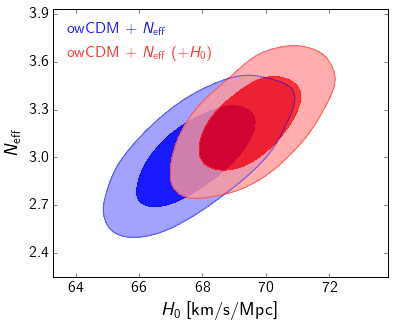

In [50]:
roots = ['OkwoCDM+Neff_PLK+DR12+ALLB+JLA', 'OkwoCDM+Neff_PLK+DR12+ALLB+JLA+HST']
#'OkwoCDM+Neff_PLK+DR12+ALLB+JLA', 'OkwoCDM+Neff_PLK+DR12+ALLB+JLA+HST',
g= plots.getSinglePlotter(chain_dir = dir_name, ratio=0.8, analysis_settings={'smooth_scale_2D': -1,
                                                                             'ignore_rows': 0.2})
g.plot_2d(roots, param_pair=['H0','nnu'], filled=True, legend_labels=False,
        colors = ['blue', 'red', 'OrangeRed'], alphas=[0.9,0.8,0.9,0.9])

#g = plots.getSubplotPlotter(chain_dir = dir_name, width_inch=10 , 
#                            analysis_settings={'smooth_scale_2D': -1., 'smooth_scale_1D': -1.})
#g.triangle_plot(roots, ['H0','nnu'], filled=True, 
#                contour_args=[{'alpha':0.4, 'color':'RoyalBlue', 'lw':'2'}, {'alpha':0.8, 'color':'blue'},
#                             {'alpha':0.4, 'color':'red'}, {'alpha':0.8, 'color':'red'}],
#                line_args=[{'color':'RoyalBlue'},{'ls':'--', 'color':'blue'}, {'color':'red'},
#                           {'ls':'--', 'color':'red'}],
#                legend_labels=['owCDM + $N_{\\rm eff}$', 'owCDM + $N_{\\rm eff}$ (+$H_0$)',
#                        '$\Lambda$CDM + $N_{\\rm eff}$', '$\Lambda$CDM + $N_{\\rm eff}$ (+$H_0$)'              ])

g.settings.axes_fontsize = 20
g.settings.lab_fontsize = 25


g.add_legend(['owCDM + $N_{\\rm eff}$', 'owCDM + $N_{\\rm eff}$ (+$H_0$)',
        '$\Lambda$CDM + $N_{\\rm eff}$', '$\Lambda$CDM + $N_{\\rm eff}$ (+$H_0$)'], 
             colored_text=True,  legend_loc='upper left')
g.export('Neff_owCDM_all.pdf')

/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/OkwoCDM_Neff_PLK+DR12+JLA_1.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/OkwoCDM_Neff_PLK+DR12+JLA_2.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/OkwoCDM_Neff_PLK+DR12+JLA_3.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/OkwoCDM_Neff_PLK+DR12+JLA_4.txt
Removed no burn in


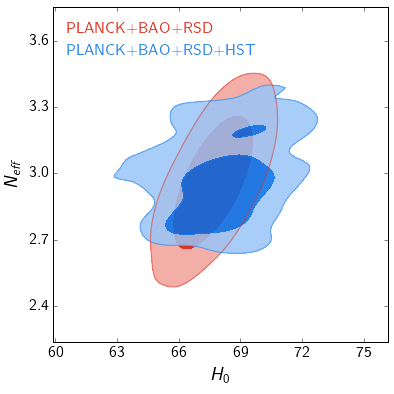

In [7]:
roots = ['OkwoCDM_Neff_PLK+DR12+JLA', 'OkwoCDM_Neff_PLK+DR12+JLA+HST']

g= plots.getSinglePlotter(chain_dir = dir_name, ratio=1., analysis_settings={'smooth_scale_2D': -1})

#plt.errorbar(73.7 , 2.3, xerr=2.3)
g.plot_2d(roots, param_pair=['H0','nnu'], filled=True, legend_labels=False, line_args={'lw':2,  'ls':'-'})


#g = plots.getSubplotPlotter(chain_dir= dir_name, width_inch=16, analysis_settings={'smooth_scale_2D': -1.})
g.settings.axes_fontsize = 20
g.settings.lab_fontsize = 25
g.settings.alpha_filled_add =0.9
g.add_y_marker(0)
g.add_x_marker(-1)


g.add_legend(['PLANCK+BAO+RSD', 'PLANCK+BAO+RSD+HST'], 
             colored_text=True,  legend_loc='upper left')
g.export('Neff_all.pdf')

# For pivot point

In [42]:

roots = ['wowaCDM_PLK+JLA','wowaCDM_PLK+BAO12', 'wowaCDM_PLK+DR12', 'wowaCDM_PLK+DR12+JLA']

g= plots.getSinglePlotter(chain_dir = dir_name, ratio=1., analysis_settings={'smooth_scale_2D': -1.})
#g.plot_2d(roots, param_pair=['w','wa'], filled=True, legend_labels=False, line_args={'lw':2,  'ls':'-'},
#             lims=[-1.8,0,-1.9,1.5])


samples = g.sampleAnalyser.samplesForRoot('wowaCDM_PLK+DR12+ALLB+JLA')
p = samples.getParams()

samples2 = g.sampleAnalyser.samplesForRoot('wowaCDM_PLK+DR12+ALLB')
p2 = samples2.getParams()

samples3 = g.sampleAnalyser.samplesForRoot('wowaCDM_PLK+BAO12')
p3 = samples3.getParams()

samples4 = g.sampleAnalyser.samplesForRoot('wowaCDM_PLK+JLA')
p4 = samples4.getParams()


samples_pok = g.sampleAnalyser.samplesForRoot('OkwowaCDM_PLK+DR12+ALLB+JLA')
pok = samples_pok.getParams()

samples_pok2 = g.sampleAnalyser.samplesForRoot('OkwowaCDM_PLK+DR12+ALLB')
pok2 = samples_pok2.getParams()

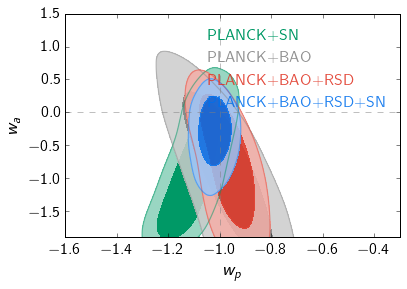

In [56]:
ppoint= 0.265905

samples.addDerived( p.w + ppoint*p.wa, name='wz', label='w_p')
samples2.addDerived(p2.w + ppoint*p2.wa, name='wz', label='w_p')
samples3.addDerived(p3.w + ppoint*p3.wa, name='wz', label='w_p')
samples4.addDerived(p4.w + ppoint*p4.wa, name='wz', label='w_p')

samples.updateBaseStatistics()
samples2.updateBaseStatistics()
g.plot_2d(roots, param_pair=['wz','wa'], filled=True, legend_labels=False, line_args={'lw':2,  'ls':'-'},
             lims=[-1.6,-0.3,-1.9,1.5])

g.settings.axes_fontsize = 20
g.settings.lab_fontsize = 25
g.settings.alpha_filled_add =0.9
g.add_y_marker(0)
g.add_x_marker(-1)

g.add_legend(['PLANCK+SN','PLANCK+BAO', 'PLANCK+BAO+RSD', 'PLANCK+BAO+RSD+SN'], 
             colored_text=True,  legend_loc='upper right')

## Compute the pivot point

In [36]:
def redz_pivot(samples, pdata):
    wo = samples.mean(pdata.w)
    wa = samples.mean(pdata.wa)
    [wowo, wowa],[wowa, wawa] = samples.cov([pdata.w, pdata.wa])
    a_z = 1 - (wa*wowo - wo*wowa)/(wo*wawa - wa*wowa) 
    print '1-a', 1-a_z, ', redz', 1/a_z - 1    
    return 1/a_z - 1

In [43]:
#wowaCDM_PLK+DR12+JLA
ppoint1 =redz_pivot(samples, p)

#OkwowaCDM_PLK+DR12+JLA
ppoint2=redz_pivot(samples_pok, pok)


1-a 0.268708983027 , redz 0.367444665381
1-a 0.223807107912 , redz 0.288339548317


In [38]:
def mean_std(samples, p, ppoint):
    print 'mean', samples.mean(p.w + ppoint*p.wa)
    print 'std', samples.std(p.w + ppoint*p.wa)

In [44]:
#wowaCDM_PLK+DR12+JLA
mean_std(samples, p, ppoint1)

#OkwowaCDM_PLK+DR12+JLA
mean_std(samples_pok, pok, ppoint2)

mean -1.04621327787
std 0.0524802618896
mean -1.04995871487
std 0.0586174286821


### Figure of merit

In [40]:
def FoM(samples, p):
    ff = (np.linalg.det(samples.cov([p.w,p.wa])))**(-0.5)
    print 'FoM:' , ff

In [46]:
#wowaCDM_PLK+DR12+JLA
FoM(samples, p)

#wowaCDM_PLK+DR12
FoM(samples2, p2)

#OkwowaCDM_PLK+DR12+JLA
FoM(samples_pok, pok)

#OkwowaCDM_PLK+DR12
FoM(samples_pok2, pok2)

FoM: 75.4111462694
FoM: 32.6214234857
FoM: 44.6270746848
FoM: 22.8575389626


/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/woCDM_PLK+DR12+ALLB_1.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/woCDM_PLK+DR12+ALLB_2.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/woCDM_PLK+DR12+ALLB_3.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/woCDM_PLK+DR12+ALLB_4.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/woCDM_PLK+DR12+ALLB_5.txt
Removed no burn in


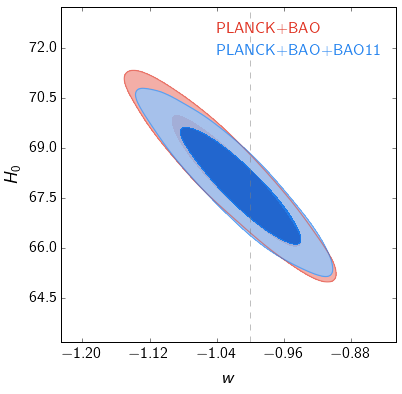

In [364]:
roots = ['woCDM_PLK+DR12','woCDM_PLK+DR12+ALLB']

g= plots.getSinglePlotter(chain_dir = dir_name, ratio=1., analysis_settings={'smooth_scale_2D': -1.})
g.plot_2d(roots, param_pair=['w','H0'], filled=True, legend_labels=False, line_args={'lw':2,  'ls':'-'})

#g = plots.getSubplotPlotter(chain_dir= dir_name, width_inch=16, analysis_settings={'smooth_scale_2D': -1.})
g.settings.axes_fontsize = 20
g.settings.lab_fontsize = 25
g.settings.alpha_filled_add =0.9
g.add_y_marker(0)
g.add_x_marker(-1)

#g.plots_2d(roots, param_pairs=[['omegak','w'], ['omegak','H0'], ['w','H0']], nx=3, filled=True, 
#           legend_labels=False, line_args={'lw':2,  'ls':'-'})

g.add_legend(['PLANCK+BAO', 'PLANCK+BAO+BAO11'], 
             colored_text=True,  legend_loc='upper right')
#g.export('OkwoCDM_all.pdf')

/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/LCDM_ABfs8_PLK+DR12+ALLB_1.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/LCDM_ABfs8_PLK+DR12+ALLB_2.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/LCDM_ABfs8_PLK+DR12+ALLB_3.txt
/Users/josevazquezgonzalez/Desktop/BOSS/BOSS_files/DR12/chains/LCDM_ABfs8_PLK+DR12+ALLB_4.txt
Removed 0.2 as burn in


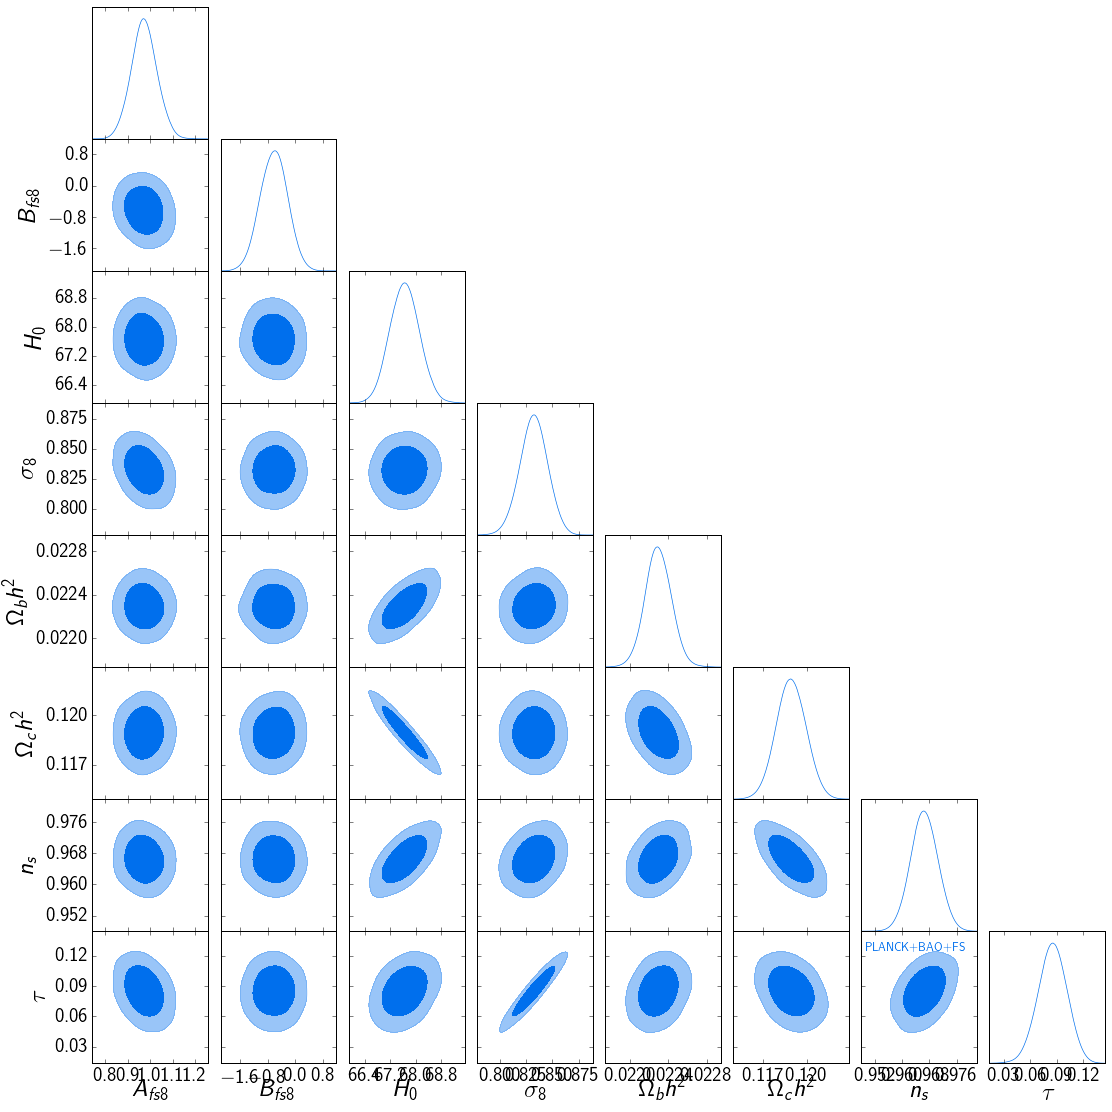

In [89]:

roots = ['LCDM_ABfs8_PLK+DR12+ALLB']

g = plots.getSubplotPlotter(chain_dir= dir_name, analysis_settings={'smooth_scale_2D': -1., 'ignore_rows': 0.2})
g.settings.axes_fontsize = 20
g.settings.lab_fontsize = 25
g.settings.alpha_filled_add =0.9
g.triangle_plot(roots, params=['Afs8','Bfs8','H0','sigma8', 'omegabh2','omegach2','ns','tau'], filled=True)
#g.plot_2d(roots, 'Afs8','Bfs8', filled=True, legend_labels=False, colors = ['blue'], alphas=[0.8])
g.add_legend(['PLANCK+BAO+FS'], colored_text=True,  legend_loc='upper right')


g.export('Afs8_degene.pdf')

# DR12

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from getdist import plots
import planckStyle
import pylab
import numpy as np
from pylab import *

dir_name = '/Users/josevazquezgonzalez/Desktop/chains_Lya'

#params1 = {'backend': 'pdf',
#               'axes.labelsize': 20,
#               'xtick.labelsize': 20,
#               'ytick.labelsize': 20,
#               'legend.fontsize': 16,
#               'lines.markersize': 6,
#               'font.size': 25,
#               'text.usetex': True}#
#pylab.rcParams.update(params1)

import fitsio
import numpy as np
import healpy as hp
import pandas as pd

/Users/josevazquezgonzalez/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [473]:
g= plots.getSinglePlotter(chain_dir = dir_name, ratio=1., 
                     analysis_settings={'smooth_scale_2D': -1., 'ignore_rows': 0.3, 'contours': [0.68, 0.95, 0.995]})

samples5 = g.sampleAnalyser.samplesForRoot('oLCDM_pre_LBAO12')
p5 = samples5.getParams()

samples5.addDerived( 1- p5.Ok - p5.Om, name='Ol', label='$\Omega_{\Lambda}$')

fits = fitsio.FITS('Contour_LBAO.fits')
cl=np.array([68,95])
dchi2=-2*np.log(1-cl/100.)

chi2 = fits[0].read()
om   = fits[1].read()
ol   = fits[2].read() 
cont = pylab.contourf(np.unique(om),np.unique(ol),chi2,levels=np.append(0,dchi2),colors=["#60A0FF","#90C0FF","#C0E0FF"], 
                      alphas=[0.5])
cont = pylab.contour(np.unique(om),np.unique(ol),chi2,levels=dchi2,colors="r")

g.settings.num_plot_contours = 2
g.settings.alpha_factor_contour_lines = 1.
g.plot_2d(['oLCDM_pre_LBAO12'], param_pair=['Om','Ol'], 
          filled=True, legend_labels=False, line_args={'lw':1,  'ls':'-'}, colors = ['green'],
           alphas=[0.9]) # lims=[0,1.0,0,1.2],

g.add_legend(['o$\Lambda$CDM LBAO'], 
             colored_text=True,  legend_loc='upper left')    
g.export('LBAO.pdf')

GetDistPlotError: chain not found: oLCDM_pre_LBAO12

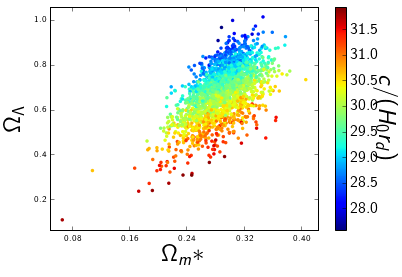

In [51]:
g.plot_3d(['oLCDM_pre_BBAO12'], ['Om','Ol','Pr'])

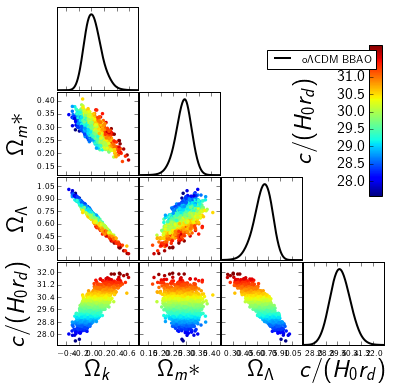

In [52]:
g.settings.axes_fontsize = 9
g.settings.legend_fontsize = 11
g.triangle_plot(['oLCDM_pre_BBAO12'], ['Ok','Om','Ol','Pr'], 
                plot_3d_with_param='Pr', 
                legend_labels=['Simulation'])
g.add_legend(['o$\Lambda$CDM BBAO'], 
               legend_loc='best')
g.export('Lya_DR12_Ok_3D.pdf')

In [32]:
samples.mean(1- p.Ok - p.Om), samples.std(1- p.Ok - p.Om), samples.twoTailLimits(1- p.Ok - p.Om, 0.9979) #95)

(1.2544305325114526, 0.29015604213725654, array([-0.058228,  1.7068  ]))

In [30]:
samples.mean(p.Om), samples.std(p.Om), samples.twoTailLimits(p.Om, 0.95)

(0.8603816838604087, 0.41852842991579331, array([-0.10026,  1.46546]))

In [26]:
samples.mean(p.Pr), samples.std(p.Pr), samples.twoTailLimits(p.Pr, 0.95)

(40.498847176129075, 9.268274040755994, array([ 18.5471,  53.0925]))

In [128]:
samples6.mean(p6.Pr), samples6.std(p6.Pr)

(29.900736717583349, 0.68290304555775705)

In [173]:
samples5.mean(p5.Ok), samples5.std(p5.Ok)

(-1.006980333975279, 0.70568910018684794)

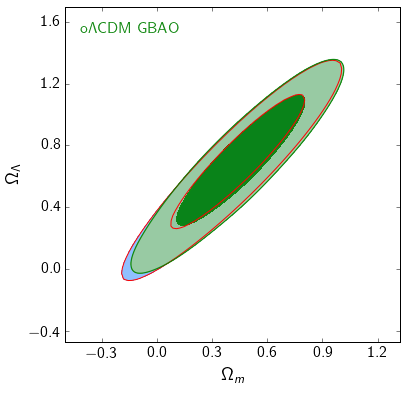

In [159]:
g= plots.getSinglePlotter(chain_dir = dir_name, ratio=1., 
                     analysis_settings={'smooth_scale_2D': -1., 'ignore_rows': 0.3, 'contours': [0.68, 0.95, 0.995]})

samples5 = g.sampleAnalyser.samplesForRoot('oLCDM_pre_GBAO12')
p5 = samples5.getParams()

samples5.addDerived( 1- p5.Ok - p5.Om, name='Ol', label='$\Omega_{\Lambda}$')

fits = fitsio.FITS('Contour_Gal.fits')
cl=np.array([68,95])
dchi2=-2*np.log(1-cl/100.)

chi2 = fits[0].read()
om   = fits[1].read()
ol   = fits[2].read() 
cont = pylab.contourf(np.unique(om),np.unique(ol),chi2,levels=np.append(0,dchi2),colors=["#60A0FF","#90C0FF","#C0E0FF"], 
                      alphas=[0.5])
cont = pylab.contour(np.unique(om),np.unique(ol),chi2,levels=dchi2,colors="r")

g.settings.num_plot_contours = 2
g.settings.alpha_factor_contour_lines = 1.
g.plot_2d(['oLCDM_pre_GBAO12'], param_pair=['Om','Ol'], 
          filled=True, legend_labels=False, line_args={'lw':1,  'ls':'-'}, colors = ['green'],
           alphas=[0.9]) # lims=[0,1.0,0,1.2],

g.add_legend(['o$\Lambda$CDM GBAO'], 
             colored_text=True,  legend_loc='upper left')  
g.export('GBAO.pdf')

/Users/josevazquezgonzalez/Desktop/chains_Lya/oLCDM_pre_Alam_1.txt
/Users/josevazquezgonzalez/Desktop/chains_Lya/oLCDM_pre_Alam_2.txt
/Users/josevazquezgonzalez/Desktop/chains_Lya/oLCDM_pre_Alam_3.txt
/Users/josevazquezgonzalez/Desktop/chains_Lya/oLCDM_pre_Alam_4.txt
/Users/josevazquezgonzalez/Desktop/chains_Lya/oLCDM_pre_Alam_5.txt
/Users/josevazquezgonzalez/Desktop/chains_Lya/oLCDM_pre_Alam_6.txt
Removed 0.3 as burn in


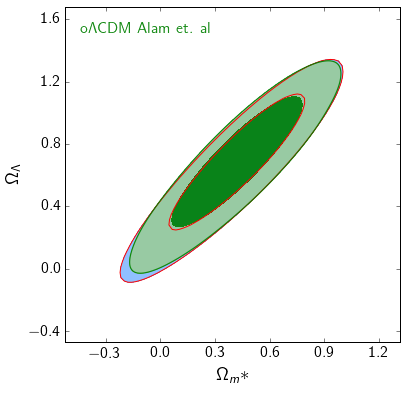

In [158]:
g= plots.getSinglePlotter(chain_dir = dir_name, ratio=1., 
                     analysis_settings={'smooth_scale_2D': -1., 'ignore_rows': 0.3, 'contours': [0.68, 0.95, 0.995]})

samples5 = g.sampleAnalyser.samplesForRoot('oLCDM_pre_Alam')
p5 = samples5.getParams()

samples5.addDerived( 1- p5.Ok - p5.Om, name='Ol', label='$\Omega_{\Lambda}$')

fits = fitsio.FITS('Contour_Alam.fits')
cl=np.array([68,95])
dchi2=-2*np.log(1-cl/100.)

chi2 = fits[0].read()
om   = fits[1].read()
ol   = fits[2].read() 
cont = pylab.contourf(np.unique(om),np.unique(ol),chi2,levels=np.append(0,dchi2),colors=["#60A0FF","#90C0FF","#C0E0FF"], 
                      alphas=[0.5])
cont = pylab.contour(np.unique(om),np.unique(ol),chi2,levels=dchi2,colors="r")

g.settings.num_plot_contours = 2
g.settings.alpha_factor_contour_lines = 1.
g.plot_2d(['oLCDM_pre_Alam'], param_pair=['Om','Ol'], 
          filled=True, legend_labels=False, line_args={'lw':1,  'ls':'-'}, colors = ['green'],
           alphas=[0.9]) # lims=[0,1.0,0,1.2],

g.add_legend(['o$\Lambda$CDM Alam et. al'], 
             colored_text=True,  legend_loc='upper left') 
g.export('Alam.pdf')

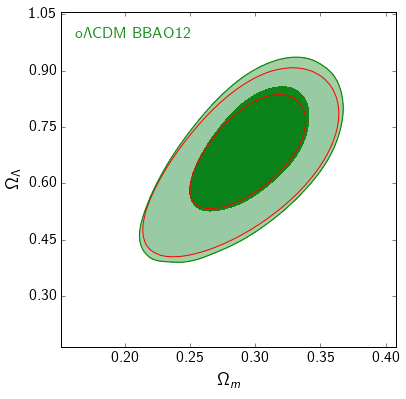

In [171]:
g= plots.getSinglePlotter(chain_dir = dir_name, ratio=1., 
                     analysis_settings={'smooth_scale_2D': -1., 'ignore_rows': 0.3, 'contours': [0.68, 0.95, 0.995]})

samples5 = g.sampleAnalyser.samplesForRoot('oLCDM_pre_BBAO12')
p5 = samples5.getParams()

samples5.addDerived( 1- p5.Ok - p5.Om, name='Ol', label='$\Omega_{\Lambda}$')

fits = fitsio.FITS('Contour_BBAO.fits')
cl=np.array([68,95])
dchi2=-2*np.log(1-cl/100.)

chi2 = fits[0].read()
om   = fits[1].read()
ol   = fits[2].read() 
cont = pylab.contourf(np.unique(om),np.unique(ol),chi2,levels=np.append(0,dchi2),colors=["#60A0FF","#90C0FF","#C0E0FF"], 
                      alphas=[0.5])
cont = pylab.contour(np.unique(om),np.unique(ol),chi2,levels=dchi2,colors="r")

g.settings.num_plot_contours = 2
g.settings.alpha_factor_contour_lines = 1.
g.plot_2d(['oLCDM_pre_BBAO12'], param_pair=['Om','Ol'], 
          filled=True, legend_labels=False, line_args={'lw':1,  'ls':'-'}, colors = ['green'],
           alphas=[0.9]) # lims=[0,1.0,0,1.2],

g.add_legend(['o$\Lambda$CDM BBAO12'], 
             colored_text=True,  legend_loc='upper left') 
g.export('BBAO.pdf')

In [172]:
samples5.mean(1- p5.Ok - p5.Om), samples5.std(1- p5.Ok - p5.Om), samples5.twoTailLimits(1- p5.Ok - p5.Om, 0.95) #95)

(0.67806579195161032, 0.11308191675040831, array([ 0.434161,  0.876125]))

In [173]:
samples5.mean(p5.Ok), samples5.std(p5.Ok), samples5.twoTailLimits(p5.Ok, 0.95) #95)

(0.027459822252944785, 0.1349004606111168, array([-0.206219,  0.322089]))

In [174]:
samples5.mean(p5.Om), samples5.std(p5.Om), samples5.twoTailLimits(p5.Om, 0.95) #95)

(0.29447438579544483, 0.031380594744811051, array([ 0.22761 ,  0.351688]))

In [175]:
samples5.mean(p5.Pr), samples5.std(p5.Pr), samples5.twoTailLimits(p5.Pr, 0.95) #95)

(29.834440453882035, 0.6700321741264057, array([ 28.582 ,  31.2046]))

In [323]:
fits = fitsio.FITS('Contour_Gal.fits')
cl=np.array([68,95])
dchi2=-2*np.log(1-cl/100.)

chi2 = fits[0].read()
om   = fits[1].read()
ol   = fits[2].read() 

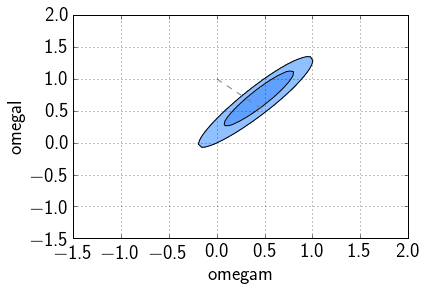

In [324]:
cont = pylab.contourf(np.unique(om),np.unique(ol),chi2,levels=np.append(0,dchi2),colors=["#60A0FF","#90C0FF","#C0E0FF"])
cont = pylab.contour(np.unique(om),np.unique(ol),chi2,levels=dchi2,colors="k")
pylab.grid()
pylab.xlabel("omegam")
pylab.ylabel("omegal")
pylab.plot([0,0.5],[1.,0.5],"--",c="gray")

/Users/josevazquezgonzalez/Desktop/chains_Lya/oLCDM_pre_Planck_15_1.txt
/Users/josevazquezgonzalez/Desktop/chains_Lya/oLCDM_pre_Planck_15_2.txt
/Users/josevazquezgonzalez/Desktop/chains_Lya/oLCDM_pre_Planck_15_3.txt
/Users/josevazquezgonzalez/Desktop/chains_Lya/oLCDM_pre_Planck_15_4.txt
/Users/josevazquezgonzalez/Desktop/chains_Lya/oLCDM_pre_Planck_15_5.txt
/Users/josevazquezgonzalez/Desktop/chains_Lya/oLCDM_pre_Planck_15_6.txt
Removed 0.3 as burn in


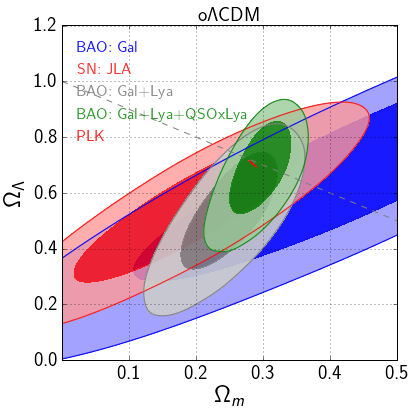

In [211]:

g= plots.getSinglePlotter(chain_dir = dir_name, ratio=1, 
                     analysis_settings={'smooth_scale_2D': -1., 'ignore_rows': 0.3, 'contours': [0.68, 0.95, 0.995]})

samples2 = g.sampleAnalyser.samplesForRoot('oLCDM_pre_GLaBAO12')
p2 = samples2.getParams()

samples3 = g.sampleAnalyser.samplesForRoot('oLCDM_pre_SN')
p3 = samples3.getParams()

samples4 = g.sampleAnalyser.samplesForRoot('oLCDM_pre_GBAO12')
p4 = samples4.getParams()

samples5 = g.sampleAnalyser.samplesForRoot('oLCDM_pre_BBAO12')
p5 = samples5.getParams()

samples6 = g.sampleAnalyser.samplesForRoot('oLCDM_pre_Planck_15')
p6 = samples6.getParams()


samples2.addDerived( 1- p2.Ok - p2.Om, name='Ol', label='$\Omega_{\Lambda}$')
samples3.addDerived( 1- p3.Ok - p3.Om, name='Ol', label='$\Omega_{\Lambda}$')
samples4.addDerived( 1- p4.Ok - p4.Om, name='Ol', label='$\Omega_{\Lambda}$')
samples5.addDerived( 1- p5.Ok - p5.Om, name='Ol', label='$\Omega_{\Lambda}$')
samples6.addDerived( 1- p6.Ok - p6.Om, name='Ol', label='$\Omega_{\Lambda}$')


#fits = fitsio.FITS('Contour_BAO.fits')
#cl=np.array([68,95])
#dchi2=-2*np.log(1-cl/100.)

#chi2 = fits[0].read()
#om   = fits[1].read()
#ol   = fits[2].read() 
#cont = pylab.contourf(np.unique(om),np.unique(ol),chi2,levels=np.append(0,dchi2),colors=["#60A0FF","#90C0FF","#C0E0FF"], 
#                      alphas=[0.5])
#cont = pylab.contour(np.unique(om),np.unique(ol),chi2,levels=dchi2,colors="r")
pylab.grid(True)
pylab.plot([0,0.5],[1.,0.5],"--",c="gray")
#pylab.plot([.459],[.578], "*", c='red', markersize=12)

pylab.title('o$\Lambda$CDM', fontsize=20)

g.settings.axes_fontsize = 20
g.settings.lab_fontsize = 25
g.settings.num_plot_contours = 2
g.settings.alpha_factor_contour_lines = 1.


g.plot_2d(['oLCDM_pre_GBAO12','oLCDM_pre_SN','oLCDM_pre_GLaBAO12','oLCDM_pre_BBAO12', 'oLCDM_pre_Planck_15'], 
          param_pair=['Om','Ol'], 
          filled=True, legend_labels=False, line_args={'lw':1,  'ls':'-'}, 
          colors = ['blue','red', 'gray', 'green', 'red'],
           alphas=[0.9, 0.8, 0.9, 0.8], lims=[0,0.5,0,1.201])
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5],['0.1', '0.2', '0.3', '0.4', '0.5'])

g.add_legend(['BAO: Gal','SN: JLA', 'BAO: Gal+Lya', 'BAO: Gal+Lya+QSOxLya', 'PLK'], 
             colored_text=True,  legend_loc='upper left') 
g.export('SimpleMC.pdf')


/Users/josevazquezgonzalez/Desktop/chains_Lya/oLCDM_pre_GLxBAO12_1.txt
/Users/josevazquezgonzalez/Desktop/chains_Lya/oLCDM_pre_GLxBAO12_2.txt
/Users/josevazquezgonzalez/Desktop/chains_Lya/oLCDM_pre_GLxBAO12_3.txt
/Users/josevazquezgonzalez/Desktop/chains_Lya/oLCDM_pre_GLxBAO12_4.txt
/Users/josevazquezgonzalez/Desktop/chains_Lya/oLCDM_pre_GLxBAO12_5.txt
/Users/josevazquezgonzalez/Desktop/chains_Lya/oLCDM_pre_GLxBAO12_6.txt
Removed 0.1 as burn in


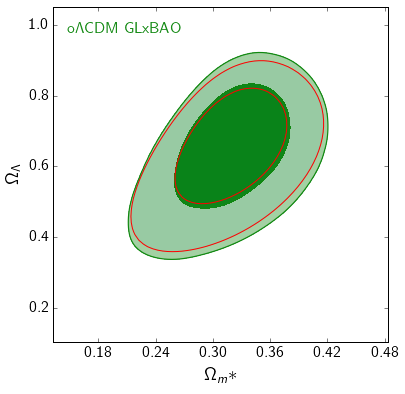

In [155]:
g= plots.getSinglePlotter(chain_dir = dir_name, ratio=1., 
                     analysis_settings={'smooth_scale_2D': -1., 'ignore_rows': 0.1, 'contours': [0.68, 0.95, 0.995]})

samples5 = g.sampleAnalyser.samplesForRoot('oLCDM_pre_GLxBAO12')
p5 = samples5.getParams()

samples5.addDerived( 1- p5.Ok - p5.Om, name='Ol', label='$\Omega_{\Lambda}$')

fits = fitsio.FITS('Contour_LxGBAO.fits')
cl=np.array([68,95])
dchi2=-2*np.log(1-cl/100.)

chi2 = fits[0].read()
om   = fits[1].read()
ol   = fits[2].read() 
cont = pylab.contourf(np.unique(om),np.unique(ol),chi2,levels=np.append(0,dchi2),colors=["#60A0FF","#90C0FF","#C0E0FF"], 
                      alphas=[0.5])
cont = pylab.contour(np.unique(om),np.unique(ol),chi2,levels=dchi2,colors="r")

g.settings.num_plot_contours = 2
g.settings.alpha_factor_contour_lines = 1.
g.plot_2d(['oLCDM_pre_GLxBAO12'], param_pair=['Om','Ol'], 
          filled=True, legend_labels=False, line_args={'lw':1,  'ls':'-'}, colors = ['green'],
           alphas=[0.9]) # lims=[0,1.0,0,1.2],

g.add_legend(['o$\Lambda$CDM GLxBAO'], 
             colored_text=True,  legend_loc='upper left') 
g.export('GLxBAO.pdf')

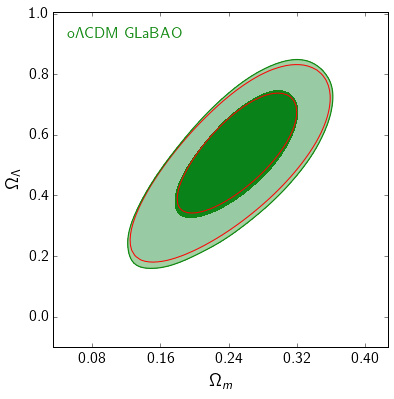

In [154]:
g= plots.getSinglePlotter(chain_dir = dir_name, ratio=1., 
                     analysis_settings={'smooth_scale_2D': -1., 'ignore_rows': 0.3, 'contours': [0.68, 0.95, 0.995]})

samples5 = g.sampleAnalyser.samplesForRoot('oLCDM_pre_GLaBAO12')
p5 = samples5.getParams()

samples5.addDerived( 1- p5.Ok - p5.Om, name='Ol', label='$\Omega_{\Lambda}$')

fits = fitsio.FITS('Contour_LaGBAO.fits')
cl=np.array([68,95])
dchi2=-2*np.log(1-cl/100.)

chi2 = fits[0].read()
om   = fits[1].read()
ol   = fits[2].read() 
cont = pylab.contourf(np.unique(om),np.unique(ol),chi2,levels=np.append(0,dchi2),colors=["#60A0FF","#90C0FF","#C0E0FF"], 
                      alphas=[0.5])
cont = pylab.contour(np.unique(om),np.unique(ol),chi2,levels=dchi2,colors="r")

g.settings.num_plot_contours = 2
g.settings.alpha_factor_contour_lines = 1.
g.plot_2d(['oLCDM_pre_GLaBAO12'], param_pair=['Om','Ol'], 
          filled=True, legend_labels=False, line_args={'lw':1,  'ls':'-'}, colors = ['green'],
           alphas=[0.9]) # lims=[0,1.0,0,1.2],

g.add_legend(['o$\Lambda$CDM GLaBAO'], 
             colored_text=True,  legend_loc='upper left') 
g.export('GLaBAO.pdf')

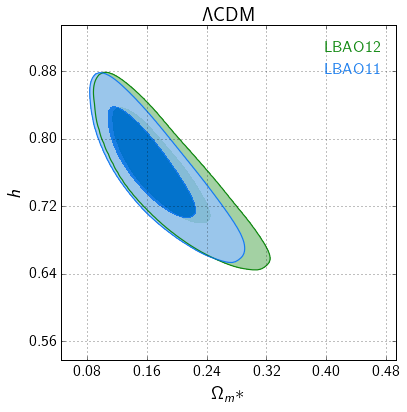

In [162]:
g= plots.getSinglePlotter(chain_dir = dir_name, ratio=1., 
                     analysis_settings={'smooth_scale_2D': -1., 'ignore_rows': 0.3, 'contours': [0.68, 0.95, 0.995]})


g.settings.num_plot_contours = 2
g.settings.alpha_factor_contour_lines = 1.
g.plot_2d(['LCDM_phy_LBAO12', 'LCDM_phy_LBAO'], 
          param_pair=['Om','h'], 
          filled=True, legend_labels=False, line_args={'lw':1,  'ls':'-'}, colors = ['green'],
           alphas=[0.9]) # lims=[0,1.0,0,1.2],

pylab.title('$\Lambda$CDM', fontsize=20)

g.add_legend(['LBAO12', 'LBAO11'], 
             colored_text=True,  legend_loc='upper right')  
g.export('Ly-BAO.pdf')
pylab.grid(True)

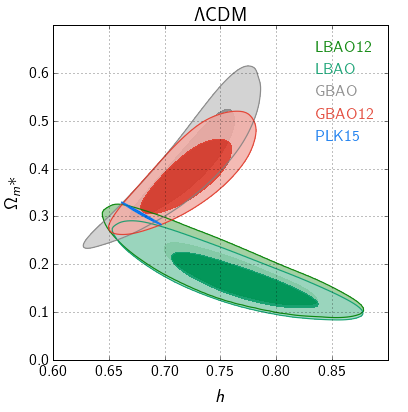

In [206]:
g= plots.getSinglePlotter(chain_dir = dir_name, ratio=1., 
                     analysis_settings={'smooth_scale_2D': -1., 'ignore_rows': 0.3, 'contours': [0.68, 0.95, 0.995]})


g.settings.num_plot_contours = 2
g.settings.alpha_factor_contour_lines = 1.
g.plot_2d(['LCDM_phy_LBAO12', 'LCDM_phy_LBAO', 
           'LCDM_phy_GBAO', 'LCDM_phy_GBAO12', 'LCDM_phy_Planck_15'],
#           'LCDM_phy_BBAO12', 'LCDM_phy_BBAO'], 
          param_pair=['h','Om'], 
          filled=True, legend_labels=False, line_args={'lw':1,  'ls':'-'}, colors = ['green'],
           alphas=[0.9], lims=[0.6,.9,0,.7])

pylab.title('$\Lambda$CDM', fontsize=20)

g.add_legend(['LBAO12', 'LBAO', 'GBAO', 'GBAO12', 'PLK15', 'BBAO'], 
             colored_text=True,  legend_loc='upper right')  
g.export('ALL_BAO.pdf')
pylab.grid(True)

In [239]:
nbin =4
np.array([i for i in np.linspace(1, 3, 5 if nbin==1 else nbin )])


array([ 1.        ,  1.66666667,  2.33333333,  3.        ])

In [231]:
np.ones(nbin)

array([ 1.])

In [232]:
nbin   = 5 if nbin==1 else nbin

In [233]:
nbin

5

In [234]:
varyc = [True, True, False]

In [235]:
len(varyc)

3

In [236]:
if nbin == 1 or nbin == 2: 
    print 'hola', nbin

In [238]:
sum(varyc)

2

In [242]:
if 4 in  [1,2,3]:
    print 'hi'